# How does income influence food choices? 🥗💰


## 📖 Background
Does eating healthy depend on what’s in your wallet? While some believe nutritious food is a luxury reserved for those who can afford it, others argue that education, accessibility, and policy interventions play an even bigger role.

As part of a public health research team, your mission is to uncover the real factors driving food choices. Are healthier foods truly more expensive, or do regional access, income distribution, and availability have a greater impact?

Your insights could help shape smarter food policies, making healthy eating more affordable and accessible for all. Are you ready to dig into the data and make a real-world impact?

## **Introduction**

Healthy eating in America is often framed as a problem of affordability, but this data analysis reveals a more complex reality. While the cost of healthy foods is consistently lower than that of unhealthy options across regions, broader socioeconomic factors such as income inequality play a critical role in shaping food choices. Lower-income households spend a much larger proportion of their income on necessities, leaving them with less financial flexibility to prioritize healthy eating. In some cases, these households spend more than they earn, compounding financial instability and limiting their ability to make healthier food choices even when those options are affordable. Regional differences in food prices, demographic factors like age, education, and gender, and disparities in income even within similar education levels further complicate the situation. Understanding these limitations and factors is essential for designing effective policy interventions that go beyond simply addressing food costs. 

## **Datasets**

There are three datasets that will be used to analyze the relationship between income levels and food choices:

### Income-Expenditure
- **`Mthly_HH_Income`** – Monthly household income
- **`Mthly_HH_Expense`** – Total monthly household expenses
- **`No_of_Fly_Members`** – Number of family members
- **`Emi_or_Rent_Amt`** – Rent or loan payments
- **`Annual_HH_Income`** – Annual household income
- **`Highest_Qualified_Member`** – Education level of the most qualified household member
- **`No_of_Earning_Members`** – Number of income earners in the household

### Dietary Habits Survey Data 
- **`Age`** – Age group of the respondent
- **`Gender`** – Male/Female
- **`Dietary Preference`** – Vegetarian, Non-Vegetarian, Vegan, etc.
- **`Meal Frequency`** – How often certain food types are consumed
- **`Food Restrictions`** – Allergies and dietary restrictions
- **`Beverage Intake`** – Hydration and drink preferences

### Food Prices
- **`Year`** – Year of data collection
- **`Month`** – Month of data collection
- **`Metroregion_code`** – Geographic area code
- **`EFPG_code`** – Food category (e.g., whole grains, processed foods)
- **`Attribute`** – Type of data recorded (e.g., price, purchase amount)
## - **`Value`** – Numeric value of the recorded attribute

## **💪 Challenge**
The public health research team has been asked to advise policymakers on the key factors influencing food choices across different income groups. 

The tasks are to analyze:

1. **Income & Food Affordability** – How does household income relate to the affordability of different food categories?
   - Use the **Income-Expenditure Dataset** to analyze household income and overall expenses.
   - The **Food Prices Dataset** reveals how food costs vary by region, helping assess affordability.
2. **Healthy vs. Unhealthy Purchases** – Do higher-income households buy healthier foods?  
   - The **Dietary Habits Survey** captures individual consumption patterns.
   - The **Food Prices Dataset** helps assess whether healthier foods are more expensive.  
3. **Regional Patterns** – Are there geographic trends in food affordability?  
   - The **Food Prices Dataset** includes location-based pricing data.
4. **Data Visualization** – Create at least one chart to highlight key insights. 
5. **[Optional] Nutritional Value vs. Cost** – Are healthier foods more expensive than processed options?  
   - Use the **Food Prices Dataset** and its **dimension table** to categorize food types and analyze price differences between healthy and unhealthy options. 

At the end of my analysis, the key insights and a visualization that summarizes the key insights will be pointed out with recommendations for policymakers.

In [40]:
# Libraries
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(corrplot)
library(reshape2)
library(plotly)

In [41]:
# Load datasets
income_expenditure <- read.csv("data/Income-Expenditure.csv")
dietary_habits <- read.csv("data/Dietary_Habits_Survey_Data.csv")
food_prices <- read.csv("data/Food_Prices.csv")
food_dimension <- read.csv("data/Food_Prices_Dimension_Table.csv") 


In [42]:
str(income_expenditure)
str(dietary_habits)
str(food_prices)

'data.frame':	50 obs. of  7 variables:
 $ Mthly_HH_Income         : int  5000 6000 10000 10000 12500 14000 15000 18000 19000 20000 ...
 $ Mthly_HH_Expense        : int  8000 7000 4500 2000 12000 8000 16000 20000 9000 9000 ...
 $ No_of_Fly_Members       : int  3 2 2 1 2 2 3 5 2 4 ...
 $ Emi_or_Rent_Amt         : int  2000 3000 0 0 3000 0 35000 8000 0 0 ...
 $ Annual_HH_Income        : int  64200 79920 112800 97200 147000 196560 167400 216000 218880 220800 ...
 $ Highest_Qualified_Member: chr  "Under-Graduate" "Illiterate" "Under-Graduate" "Illiterate" ...
 $ No_of_Earning_Members   : int  1 1 1 1 1 1 1 1 1 2 ...
'data.frame':	78 obs. of  27 variables:
 $ Age                                                                                                                                       : chr  "18-24" "18-24" "45-54" "18-24" ...
 $ Gender                                                                                                                                    : chr  "Male" "M

## **Income Analysis and Affordability**

In [43]:
# Analyze income and expense patterns
income_affordability <- income_expenditure %>%
  mutate(
    Income_per_capita = Annual_HH_Income / No_of_Fly_Members,
    Expense_per_capita = Mthly_HH_Expense / No_of_Fly_Members,
    Expense_to_Income_Ratio = Mthly_HH_Expense / Mthly_HH_Income,
    Discretionary_Income = Mthly_HH_Income - Mthly_HH_Expense - Emi_or_Rent_Amt
  ) %>%
  mutate(
    Income_Quintile = ntile(Annual_HH_Income, 5),
    Income_Bracket = case_when(
      Income_Quintile == 1 ~ "Lowest 20%",
      Income_Quintile == 2 ~ "Lower-middle",
      Income_Quintile == 3 ~ "Middle",
      Income_Quintile == 4 ~ "Upper-middle",
      Income_Quintile == 5 ~ "Highest 20%"
    )
  )

str(income_affordability)

'data.frame':	50 obs. of  13 variables:
 $ Mthly_HH_Income         : int  5000 6000 10000 10000 12500 14000 15000 18000 19000 20000 ...
 $ Mthly_HH_Expense        : int  8000 7000 4500 2000 12000 8000 16000 20000 9000 9000 ...
 $ No_of_Fly_Members       : int  3 2 2 1 2 2 3 5 2 4 ...
 $ Emi_or_Rent_Amt         : int  2000 3000 0 0 3000 0 35000 8000 0 0 ...
 $ Annual_HH_Income        : int  64200 79920 112800 97200 147000 196560 167400 216000 218880 220800 ...
 $ Highest_Qualified_Member: chr  "Under-Graduate" "Illiterate" "Under-Graduate" "Illiterate" ...
 $ No_of_Earning_Members   : int  1 1 1 1 1 1 1 1 1 2 ...
 $ Income_per_capita       : num  21400 39960 56400 97200 73500 ...
 $ Expense_per_capita      : num  2667 3500 2250 2000 6000 ...
 $ Expense_to_Income_Ratio : num  1.6 1.17 0.45 0.2 0.96 ...
 $ Discretionary_Income    : int  -5000 -4000 5500 8000 -2500 6000 -36000 -10000 10000 11000 ...
 $ Income_Quintile         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Income_Bracket          : chr 

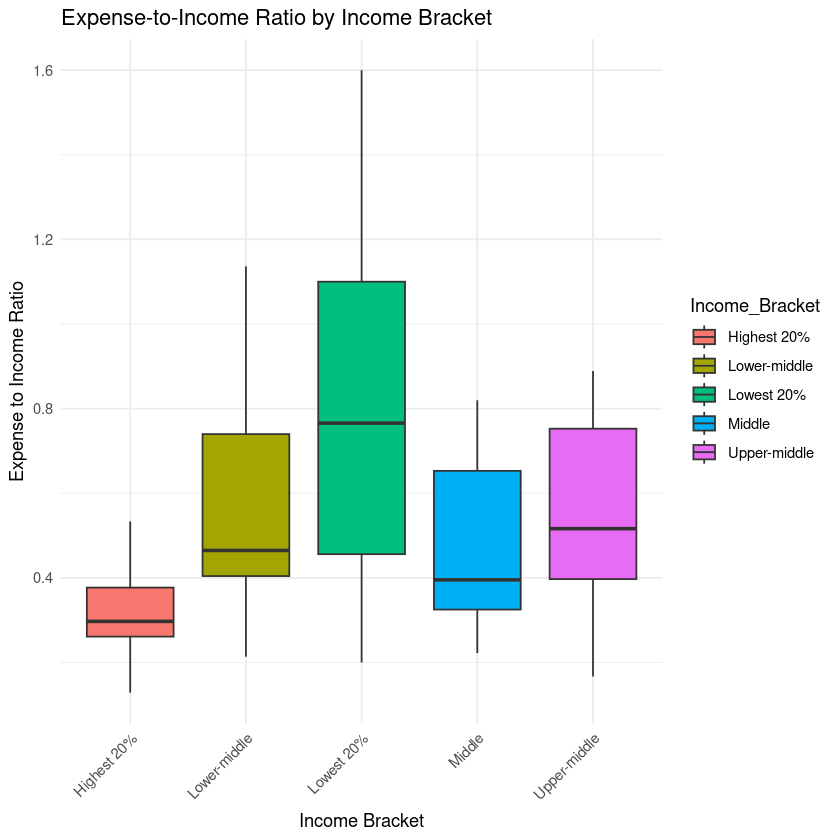

In [44]:
# Income brackets visualization
ggplot(income_affordability, aes(x = Income_Bracket, y = Expense_to_Income_Ratio, fill = Income_Bracket)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Expense-to-Income Ratio by Income Bracket",
       x = "Income Bracket",
       y = "Expense to Income Ratio") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

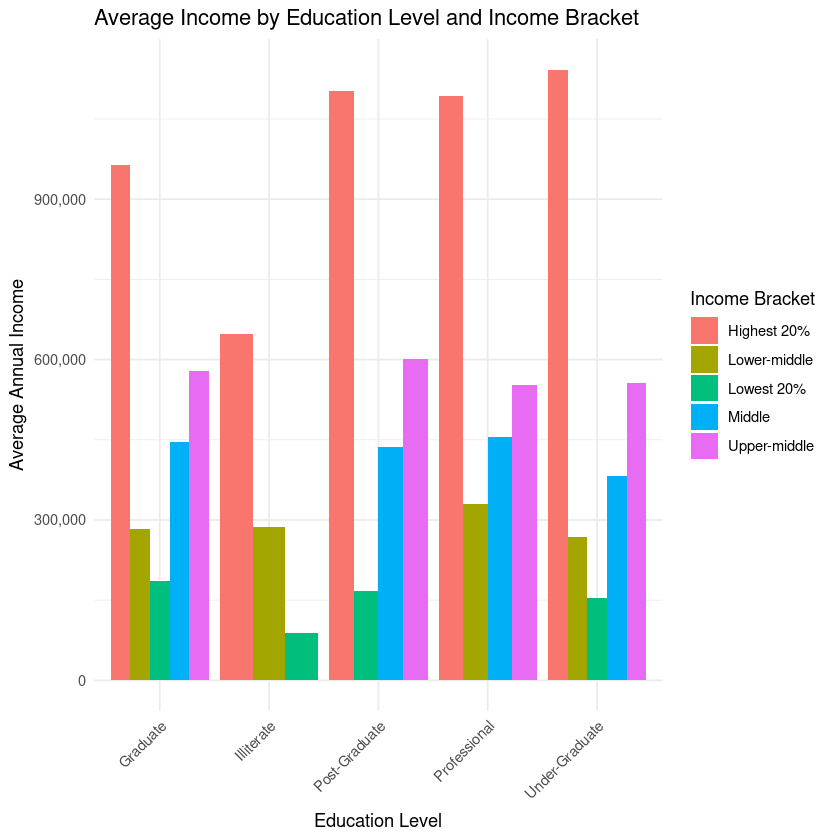

In [45]:
# Education level analysis
education_analysis <- income_affordability %>%
  group_by(Highest_Qualified_Member, Income_Bracket) %>%
  summarize(
    Avg_Income = mean(Annual_HH_Income, na.rm = TRUE),
    Avg_Expense_Ratio = mean(Expense_to_Income_Ratio, na.rm = TRUE),
    Count = n(),
    .groups = 'drop'
  )

# Education level visualization
ggplot(education_analysis, aes(x = Highest_Qualified_Member, y = Avg_Income, fill = Income_Bracket)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Average Income by Education Level and Income Bracket",
       x = "Education Level",
       y = "Average Annual Income",
       fill = "Income Bracket") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## **Healthy vs. Unhealthy Purchases**

### **Preliminary Dietary Data Exploration**

In [46]:
# Check the column names in the dietary_habits dataframe
colnames(dietary_habits)

[1] "Age"                                                                                                                                       
 [2] "Gender"                                                                                                                                    
 [3] "How.many.meals.do.you.have.a.day...number.of.regular.occasions.in.a.day.when.a.significant.and.reasonably.filling.amount.of.food.is.eaten."
 [4] "What.would.best.describe.your.diet."                                                                                                       
 [5] "Choose.all.that.apply...I.skip.meals."                                                                                                     
 [6] "Choose.all.that.apply...I.experience.feelings.of.hunger.during.the.day."                                                                   
 [7] "Choose.all.that.apply...I.consult.a.nutritionist.dietician."                                                                               
 [8] "Choose.all.that.apply...I.cook.my.own.meals."                                                                                              
 [9] "What.would.you.consider.to.be.the.main.meal.of.YOUR.day."                                                                                  
[10] "What.does.your.diet.mostly.consist.of.and.how.is.it.prepared."                                                                             
[11] "How.many.times.a.week.do.you.order.in.or.go.out.to.eat."                                                                                   
[12] "Are.you.allergic.to.any.of.the.following...Tick.all.that.apply."                                                                           
[13] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Sweet.foods."                                                 
[14] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Salty.foods."                                                 
[15] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Fresh.fruit."                                                 
[16] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Fresh.vegetables."                                            
[17] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Oily..fried.foods."                                           
[18] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Meat."                                                        
[19] "What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Seafood.."                                                    
[20] "How.frequently.do.you.consume.these.beverages..Tea."                                                                                       
[21] "How.frequently.do.you.consume.these.beverages..Coffee."                                                                                    
[22] "How.frequently.do.you.consume.these.beverages..Aerated..Soft..Drinks."                                                                     
[23] "How.frequently.do.you.consume.these.beverages..Fruit.Juices..Fresh.Packaged.."                                                             
[24] "How.frequently.do.you.consume.these.beverages..Dairy.Beverages..Milk..Milkshakes..Smoothies..Buttermilk..etc.."                            
[25] "How.frequently.do.you.consume.these.beverages..Alcoholic.Beverages."                                                                       
[26] "What.is.your.water.consumption.like..in.a.day..1.cup.250ml.approx."                                                                        
[27] "X"

In [47]:
# Rename columns
dietary_analysis <- dietary_habits %>%
  rename(
    meals_per_day = `How.many.meals.do.you.have.a.day...number.of.regular.occasions.in.a.day.when.a.significant.and.reasonably.filling.amount.of.food.is.eaten.`,
    diet_type = `What.would.best.describe.your.diet.`,
    main_meal = `What.would.you.consider.to.be.the.main.meal.of.YOUR.day.`,
    diet_composition = `What.does.your.diet.mostly.consist.of.and.how.is.it.prepared.`,
    eating_out_frequency = `How.many.times.a.week.do.you.order.in.or.go.out.to.eat.`,
    water_consumption = `What.is.your.water.consumption.like..in.a.day..1.cup.250ml.approx.`,
    Skip_meals = `Choose.all.that.apply...I.skip.meals.`,
    Feel_hunger = `Choose.all.that.apply...I.experience.feelings.of.hunger.during.the.day.`,
    Consult_nutritionist = `Choose.all.that.apply...I.consult.a.nutritionist.dietician.`,
    Cook_own_meals = `Choose.all.that.apply...I.cook.my.own.meals.`,
    sweet_foods = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Sweet.foods.`,
    salty_foods = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Salty.foods.`,
    fresh_fruit = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Fresh.fruit.`,
    veggies = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Fresh.vegetables.`,
    oily_fried_food = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Oily..fried.foods.`,
    meat = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Meat.`,
    seafood = `What.is.your.weekly.food.intake.frequency.of.the.following.food.categories...Seafood..`,
    Tea = `How.frequently.do.you.consume.these.beverages..Tea.`,
    Coffee = `How.frequently.do.you.consume.these.beverages..Coffee.`,
    Soft_drinks = `How.frequently.do.you.consume.these.beverages..Aerated..Soft..Drinks.`,
    fruits_juices = `How.frequently.do.you.consume.these.beverages..Fruit.Juices..Fresh.Packaged..`,
    Dairy_beverages = `How.frequently.do.you.consume.these.beverages..Dairy.Beverages..Milk..Milkshakes..Smoothies..Buttermilk..etc..`,
    Alcohol = `How.frequently.do.you.consume.these.beverages..Alcoholic.Beverages.`,
    Allergy = `Are.you.allergic.to.any.of.the.following...Tick.all.that.apply.`
  )


In [48]:
# Age are in categorical values so I'll transform into numeric value to get the average age for meal pattern
dietary_analysis <- dietary_analysis %>%
  mutate(numeric_age = case_when(
    Age == "18-24" ~ 21,
    Age == "25-34" ~ 29.5,
    Age == "35-44" ~ 39.5,
    Age == "45-54" ~ 49.5,
    Age == "55-64" ~ 59.5,
    Age == "65+" ~ 70,  # Assuming 70 as an average for 65+
    TRUE ~ NA_real_
  ))

In [49]:
# Check distinct inputs
unique(dietary_analysis$fresh_fruit)
unique(dietary_analysis$veggies)
unique(dietary_analysis$sweet_foods)
unique(dietary_analysis$salty_foods)
unique(dietary_analysis$oily_fried_food)
unique(dietary_analysis$Cook_own_meals)
unique(dietary_analysis$Consult_nutritionist)

[1] "Less often"          "In every meal"       "Several times a day"
[4] "Once a day"          "Once a month"        "Few times a week"   
[7] "Never"

[1] "Once a day"          "Often"               "In every meal"      
[4] "Several times a day" "Few times a week"

[1] "Less often"          "Often"               "Once a day"         
[4] "Few times a week"    "Once a month"        "Several times a day"
[7] "Never"               "In every meal"

[1] "Once a day"          "Often"               "Several times a day"
[4] "Few times a week"    "Once a month"        "In every meal"      
[7] "Never"

[1] "Less often"          "Often"               "Few times a week"   
[4] "Once a month"        "Once a day"          "Several times a day"
[7] "Never"               "In every meal"

[1] "Sometimes"       "Rarely"          "Never"           "Often"          
[5] "Very frequently"

[1] "Never"     "Rarely"    "Often"     "Sometimes"

In [50]:
dietary_health_score <- dietary_analysis %>%
  mutate(
    # Score based on fruit and veg intake
    fruit_veg_score = case_when(
      fresh_fruit %in% c("In every meal", "Several times a day", "Once a day") & 
        veggies %in% c("In every meal", "Several times a day", "Once a day") ~ 2,
      fresh_fruit %in% c("Few times a week", "Often") | 
        veggies %in% c("Few times a week", "Often") ~ 1,
      TRUE ~ 0
    ),
    
    # Score based on unhealthy food intake
    unhealthy_food_score = case_when(
      sweet_foods %in% c("In every meal", "Several times a day", "Once a day") |
        salty_foods %in% c("In every meal", "Several times a day", "Once a day") |
        oily_fried_food %in% c("In every meal", "Several times a day", "Once a day") ~ -2,
      
      sweet_foods %in% c("Few times a week", "Often") |
        salty_foods %in% c("Few times a week", "Often") |
        oily_fried_food %in% c("Few times a week", "Often") ~ -1,
      
      TRUE ~ 0
    ),
    
    # Score based on cooking and consulting behavior
    cooking_score = case_when(
      Cook_own_meals %in% c("Very frequently", "Often") ~ 1,
      TRUE ~ 0
    ),
    
    nutritionist_score = case_when(
      Consult_nutritionist %in% c("Often", "Sometimes") ~ 1,
      TRUE ~ 0
    ),
    
    total_health_score = fruit_veg_score + unhealthy_food_score + cooking_score + nutritionist_score
  )

# Grouping based on health score
dietary_health_score <- dietary_health_score %>%
  mutate(
    health_category = case_when(
      total_health_score >= 3 ~ "Excellent",
      total_health_score >= 1 ~ "Good",
      total_health_score == 0 ~ "Neutral",
      total_health_score < 0 ~ "Poor"
    )
  )


In [51]:
# Diet type analysis by demographic
diet_by_demographics <- dietary_analysis %>%
  group_by(Age, Gender, diet_type) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(Age, Gender) %>%
  mutate(Percentage = Count / sum(Count) * 100)
diet_by_demographics


New names:
• `` -> `...1`


Age,Gender,diet_type,Count,Percentage
<chr>,<chr>,<chr>,<int>,<dbl>
18-24,Female,Eggetarian (Vegetarian who consumes egg and egg products),5,25.00000
18-24,Female,Non-Vegetarian,5,25.00000
18-24,Female,Pollo-pescetarian (Vegetarian who consumes seafood and white meat),1,5.00000
18-24,Female,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),1,5.00000
18-24,Female,Vegetarian (No egg or meat),8,40.00000
18-24,Male,Eggetarian (Vegetarian who consumes egg and egg products),5,17.24138
18-24,Male,Non-Vegetarian,17,58.62069
18-24,Male,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),4,13.79310
18-24,Male,Vegetarian (No egg or meat),3,10.34483


In [52]:
meal_patterns <- dietary_analysis %>%
  group_by(meals_per_day) %>%
  summarize(
    Count = n(),
    Percentage = n() / nrow(dietary_analysis) * 100,
    Avg_age = mean(numeric_age, na.rm = TRUE)
  )
meal_patterns


meals_per_day,Count,Percentage,Avg_age
<int>,<int>,<dbl>,<dbl>
2,10,12.820513,26.8750
3,50,64.102564,26.9125
4,16,20.512821,21.0000
5,2,2.564103,21.0000


In [53]:
# Food intake frequency analysis
# reshape the food intake data to long format
food_intake_cols <- c(
  "sweet_foods",
  "salty_foods",
  "fresh_fruit",
  "veggies",
  "oily_fried_food",
  "meat",
  "seafood"
)

dietary_analysis <- dietary_analysis %>%
  pivot_longer(
    cols = all_of(food_intake_cols),
    names_to = "Food_Category",
    values_to = "Food_Frequency"
  ) 


# Healthy vs. unhealthy food consumption analysis
food_intake_health <- dietary_analysis %>%
  mutate(
    Food_Category_Display = recode(Food_Category,
                                   sweet_foods = "Sweet Foods",
                                   salty_foods = "Salty Foods",
                                   fresh_fruit = "Fresh Fruit",
                                   veggies = "Vegetables",
                                   oily_fried_food = "Oily/Fried Foods",
                                   meat = "Meat",
                                   seafood = "Seafood"
    ),
    Health_Category = case_when(
      Food_Category %in% c("fresh_fruit", "veggies", "seafood") ~ "Healthy",
      Food_Category %in% c("sweet_foods", "salty_foods", "oily_fried_food") ~ "Less Healthy",
      TRUE ~ "Neutral"
    )
  )
food_intake_health

Age,Gender,meals_per_day,diet_type,Skip_meals,Feel_hunger,Consult_nutritionist,Cook_own_meals,main_meal,diet_composition,⋯,fruits_juices,Dairy_beverages,Alcohol,water_consumption,X,numeric_age,Food_Category,Food_Frequency,Food_Category_Display,Health_Category
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,sweet_foods,Less often,Sweet Foods,Less Healthy
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,salty_foods,Once a day,Salty Foods,Less Healthy
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,fresh_fruit,Less often,Fresh Fruit,Healthy
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,veggies,Once a day,Vegetables,Healthy
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,oily_fried_food,Less often,Oily/Fried Foods,Less Healthy
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,meat,Often,Meat,Neutral
18-24,Male,5,Pollotarian (Vegetarian who consumes poultry and white meat but no red meat),Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,⋯,Never,Less often,Never,More than 15 cups,NA,21.0,seafood,Often,Seafood,Healthy
18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,⋯,Once a day,Often,Never,11-14 cups,NA,21.0,sweet_foods,Often,Sweet Foods,Less Healthy
18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,⋯,Once a day,Often,Never,11-14 cups,NA,21.0,salty_foods,Often,Salty Foods,Less Healthy


In [54]:
# Analyze consumption frequency by health category
health_consumption <- food_intake_health %>%
  group_by(Health_Category, Food_Frequency) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(Health_Category) %>%
  mutate(Percentage = Count / sum(Count) * 100)
health_consumption

New names:
• `` -> `...1`


Health_Category,Food_Frequency,Count,Percentage
<chr>,<chr>,<int>,<dbl>
Healthy,Few times a week,31,13.2478632
Healthy,In every meal,38,16.2393162
Healthy,Less often,2,0.8547009
Healthy,Never,46,19.6581197
Healthy,Often,3,1.2820513
Healthy,Once a day,57,24.3589744
Healthy,Once a month,20,8.5470085
Healthy,Several times a day,37,15.8119658
Less Healthy,Few times a week,97,41.4529915


In [55]:
# Beverage intake analysis
beverage_cols <- c(
  "Tea",
  "Coffee",
  "Soft_drinks",
  "fruits_juices",
  "Dairy_beverages",
  "Alcohol"
)

dietary_analysis <- dietary_analysis %>%
  pivot_longer(
    cols = all_of(beverage_cols),
    names_to = "Beverage_Type",
    values_to = "Beverage_Frequency"
  ) 

beverage_consumption <- dietary_analysis %>%
  group_by(Beverage_Type, Beverage_Frequency) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  group_by(Beverage_Type) %>%
  mutate(Percentage = Count / sum(Count) * 100)
beverage_consumption

New names:
• `` -> `...1`


Beverage_Type,Beverage_Frequency,Count,Percentage
<chr>,<chr>,<int>,<dbl>
Alcohol,Few times a week,35,6.410256
Alcohol,Never,406,74.358974
Alcohol,Once a month,105,19.230769
Coffee,Few times a week,140,25.641026
Coffee,Less often,7,1.282051
Coffee,Never,147,26.923077
Coffee,Once a day,119,21.794872
Coffee,Once a month,98,17.948718
Coffee,Several times a day,35,6.410256


In [56]:
# Analyze allergy prevalence
unique(dietary_analysis$Allergy)

allergy_analysis <- dietary_analysis %>%
  group_by(Allergy) %>%
  summarize(
    Count = n(),
    Percentage = n() / nrow(dietary_analysis) * 100
  )
allergy_analysis

[1] "Milk"                        "I do not have any allergies"
 [3] "Onion"                       "Curd"                       
 [5] "Leafy Vegetables"            "Peanuts and Tree Nuts"      
 [7] "Fish"                        "Deep Fried Food"            
 [9] "Corn"                        "Shellfish, Eggplant"

Allergy,Count,Percentage
<chr>,<int>,<dbl>
Corn,42,1.282051
Curd,42,1.282051
Deep Fried Food,42,1.282051
Fish,42,1.282051
I do not have any allergies,2856,87.179487
Leafy Vegetables,42,1.282051
Milk,84,2.564103
Onion,42,1.282051
Peanuts and Tree Nuts,42,1.282051


In [57]:
# Eating out analysis
eating_out <- dietary_analysis %>%
  group_by(eating_out_frequency) %>%
  summarize(
    Count = n(),
    Percentage = n() / nrow(dietary_analysis) * 100
  )
eating_out

eating_out_frequency,Count,Percentage
<int>,<int>,<dbl>
1,1638,50.000000
2,924,28.205128
3,378,11.538462
4,168,5.128205
5,126,3.846154
7,42,1.282051


### **Dietary Habits Visualization**

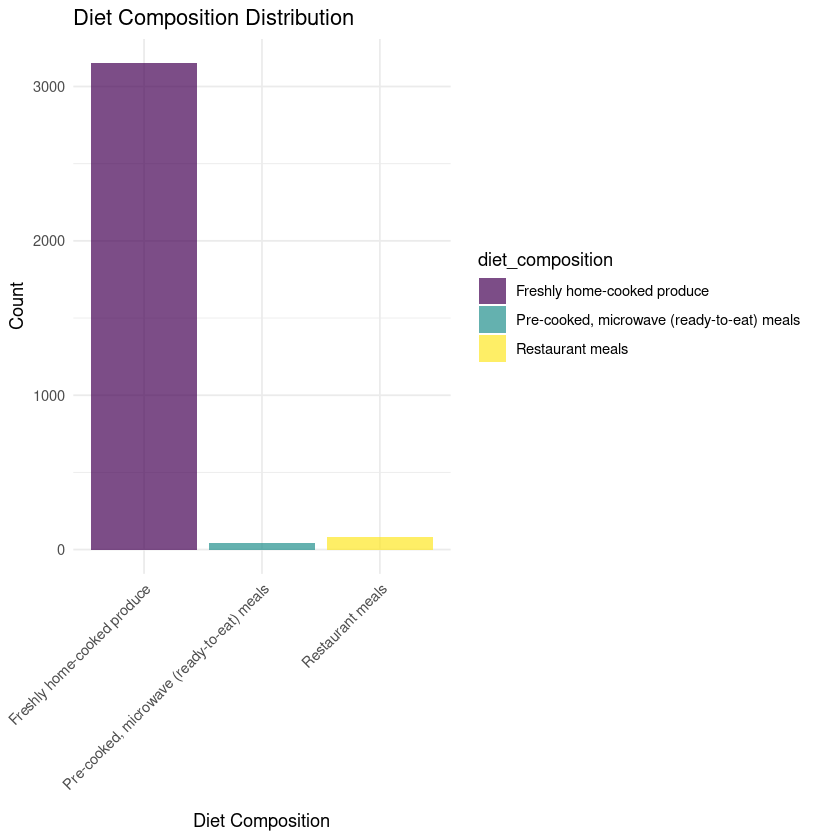

In [58]:
# Diet composition visualization
ggplot(dietary_analysis, aes(x = diet_composition, fill = diet_composition)) +
  geom_bar(alpha = 0.7) +
  theme_minimal() +
  labs(title = "Diet Composition Distribution",
       x = "Diet Composition",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_viridis_d()

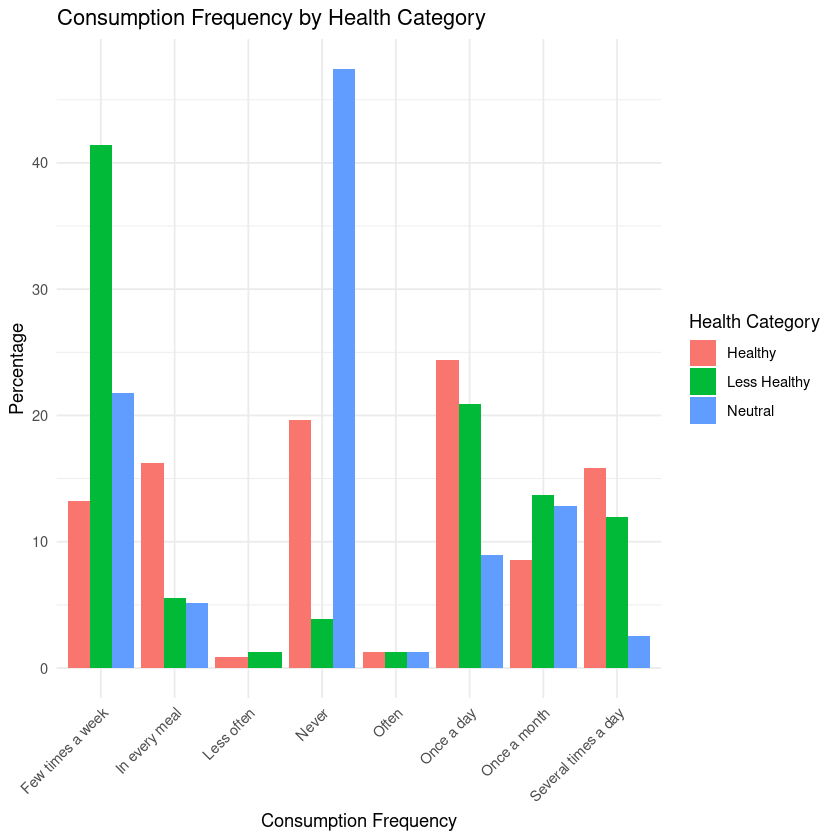

In [59]:
# Healthy vs. unhealthy food consumption
ggplot(health_consumption, aes(x = Food_Frequency, y = Percentage, fill = Health_Category)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Consumption Frequency by Health Category",
       x = "Consumption Frequency",
       y = "Percentage",
       fill = "Health Category") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

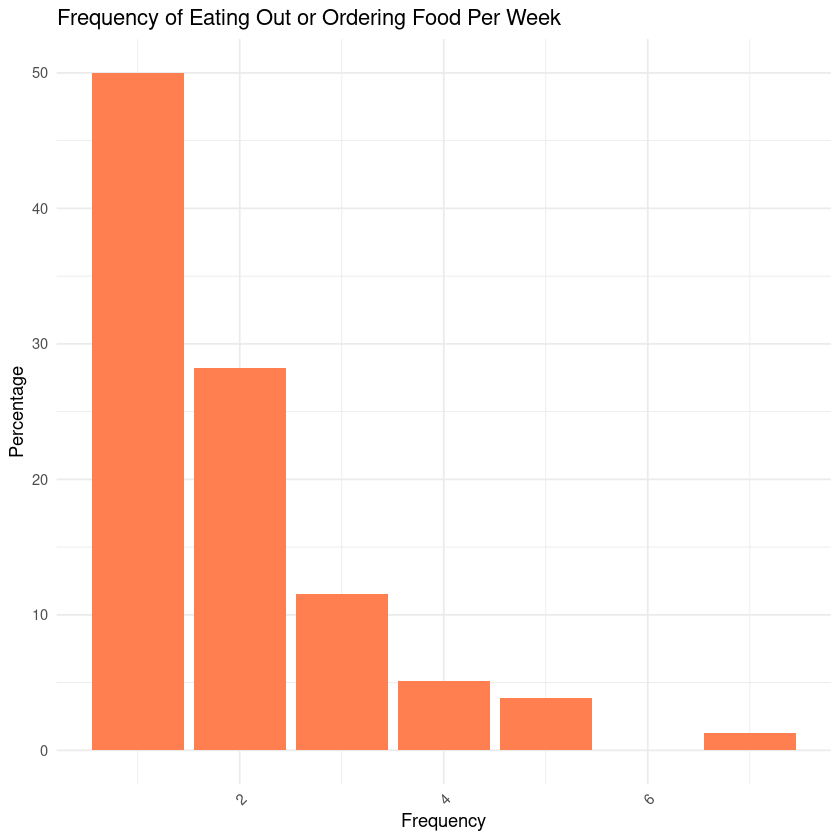

In [60]:
# Eating out frequency
ggplot(eating_out, aes(x = eating_out_frequency, y = Percentage)) +
  geom_bar(stat = "identity", fill = "coral") +
  theme_minimal() +
  labs(title = "Frequency of Eating Out or Ordering Food Per Week",
       x = "Frequency",
       y = "Percentage") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

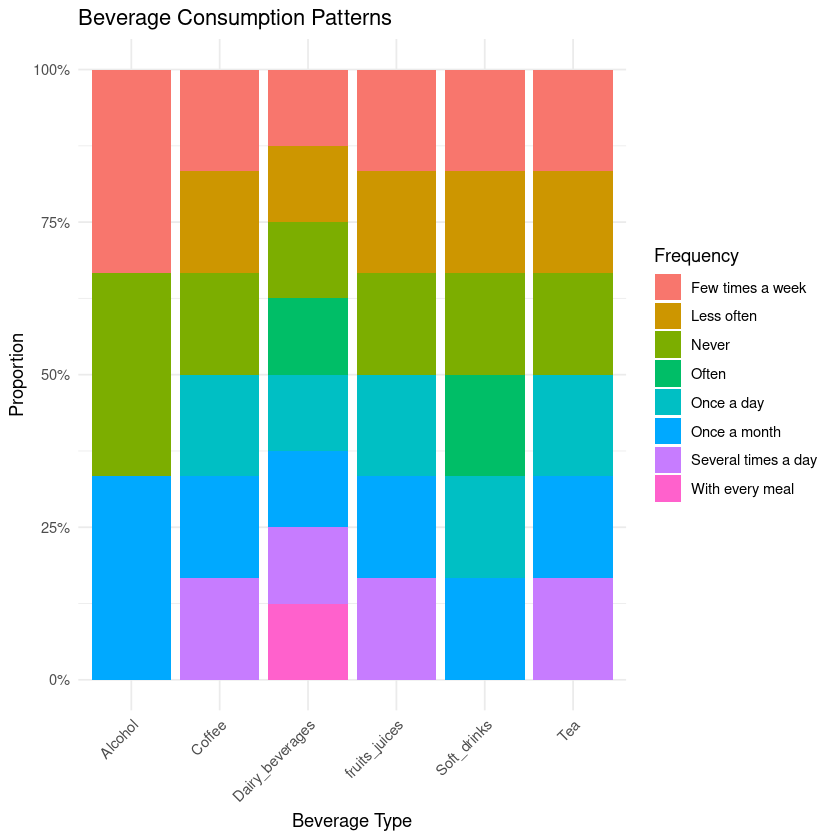

In [61]:
# Beverage consumption patterns
ggplot(beverage_consumption, aes(x = Beverage_Type, fill = Beverage_Frequency)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent) +
  theme_minimal() +
  labs(title = "Beverage Consumption Patterns",
       x = "Beverage Type",
       y = "Proportion",
       fill = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


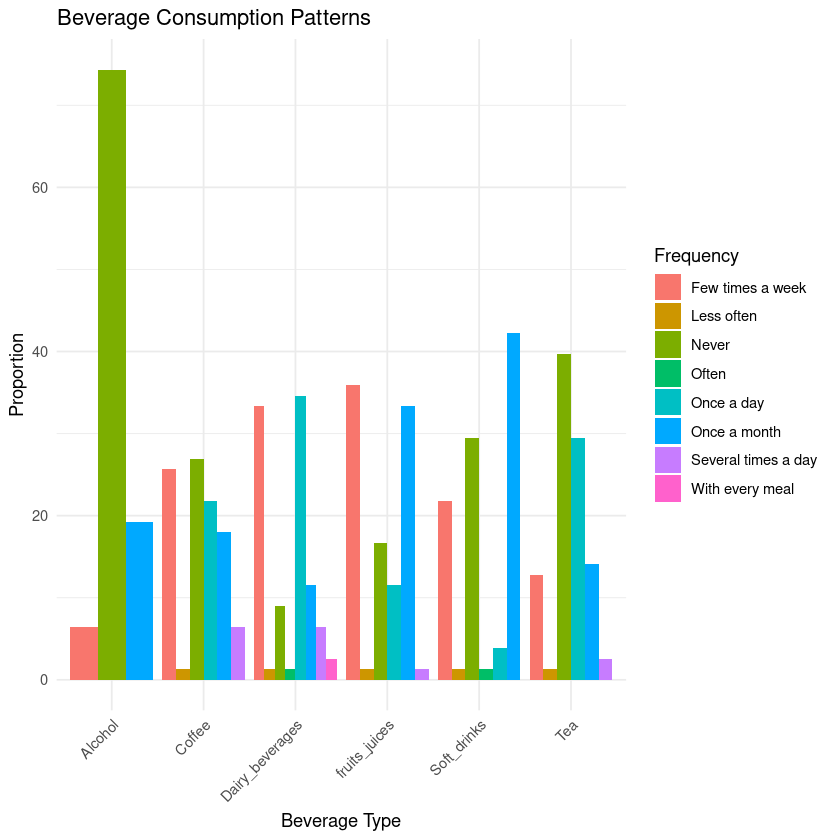

In [62]:
ggplot(beverage_consumption, aes(x = Beverage_Type, y = Percentage, fill = Beverage_Frequency)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Beverage Consumption Patterns",
       x = "Beverage Type",
       y = "Proportion",
       fill = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### **Integrating Dietary Habits with Income Analysis**

In [63]:
# Health score by gender, group and age 
count_by_group <- dietary_health_score %>%
  group_by(Age, Gender, health_category) %>%
  summarise(Count = n(), .groups = "drop")
count_by_group


Age,Gender,health_category,Count
<chr>,<chr>,<chr>,<int>
18-24,Female,Good,8
18-24,Female,Neutral,6
18-24,Female,Poor,6
18-24,Male,Good,7
18-24,Male,Neutral,17
18-24,Male,Poor,5
35-44,Female,Good,2
35-44,Female,Neutral,1
45-54,Female,Good,7


In [64]:
# Analyze health scores by demographic groups
health_by_demographics <- dietary_health_score %>%
  group_by(Age, Gender) %>%
  summarize(
    Avg_health_score = mean(total_health_score, na.rm = TRUE),
    Count = n()
  )
health_by_demographics

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
New names:
• `` -> `...1`


Age,Gender,Avg_health_score,Count
<chr>,<chr>,<dbl>,<int>
18-24,Female,0.15000000,20
18-24,Male,0.03448276,29
35-44,Female,1.00000000,3
45-54,Female,1.28571429,7
45-54,Male,0.00000000,1
Above 65,Female,1.50000000,2
Above 65,Male,0.00000000,1
Under 18,Female,0.33333333,6
Under 18,Male,0.33333333,9


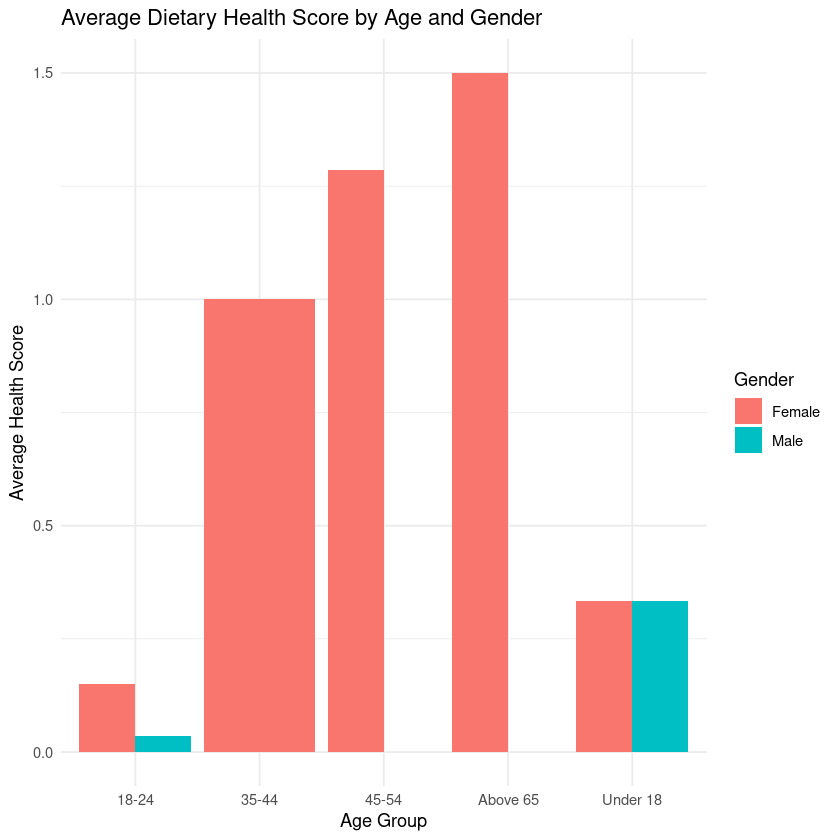

In [65]:
# Visualize health scores by gender
ggplot(health_by_demographics, aes(x = Age, y = Avg_health_score, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Average Dietary Health Score by Age and Gender",
       x = "Age Group",
       y = "Average Health Score",
       fill = "Gender")

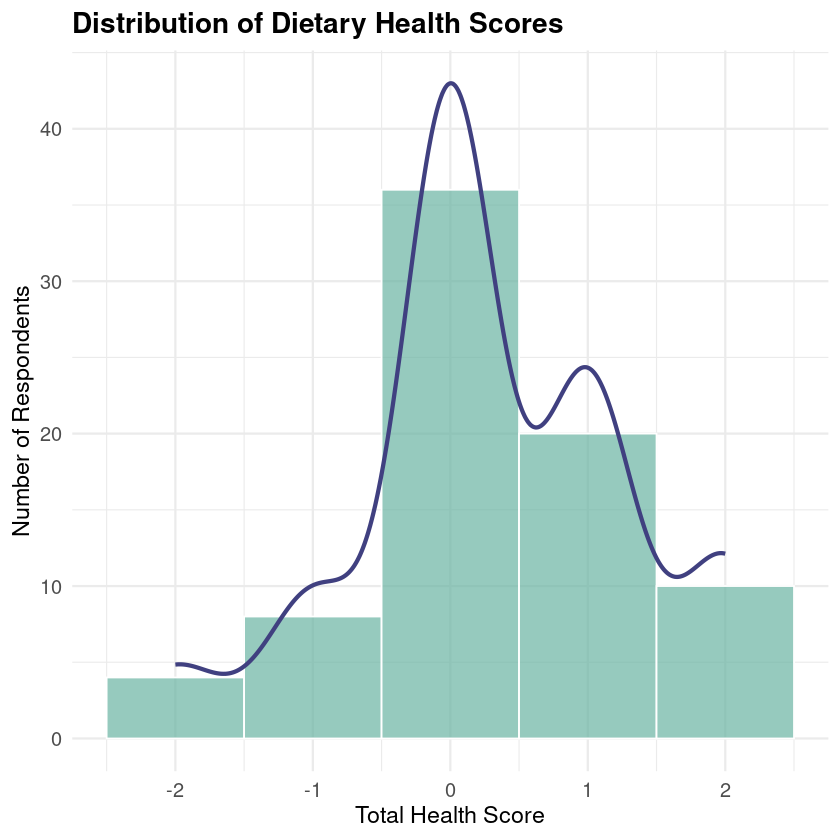

In [66]:
# Visualize health scores distribution
ggplot(dietary_health_score, aes(x = total_health_score)) +
  geom_histogram(
    binwidth = 1,
    fill = "#69b3a2",
    color = "white",
    alpha = 0.7
  ) +
  geom_density(
    aes(y = ..count..), 
    color = "#404080", 
    size = 1.2, 
    adjust = 1.2
  ) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Dietary Health Scores",
    x = "Total Health Score",
    y = "Number of Respondents"
  ) +
  scale_x_continuous(breaks = seq(-2, 4, by = 1)) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12)
  )

### **🔢 Score Range & Components**
Each person gets a total health score made from these parts:

| **Component**        | **Score Range** | **Meaning**                                               |
|-----------------------|-----------------|-----------------------------------------------------------|
| fruit_veg_score       | 0 to 2           | Higher score = more frequent fruit & veggie intake        |
| unhealthy_food_score  | 0 to -2          | Lower score = more frequent intake of sweet/salty/fried food |
| cooking_score         | 0 or 1           | 1 = often/very frequently cook own meals                  |
| nutritionist_score    | 0 or 1           | 1 = consult a nutritionist often or sometimes             |

So, the healthiness of groups from the final health score can be interpreted from the table below:

| **Avg Score Range** | **Group Healthiness**                                  |
|---------------------|--------------------------------------------------------|
| 3 to 4              | Excellent: healthy diet & behaviors                   |
| 1 to 2              | Good: room for improvement, but positive habits overall |
| 0                   | Neutral: mixed habits — likely healthy/unhealthy mix    |
| -1 to -2            | Unhealthy: frequent junk food, little/no healthy behaviors |


### **Food Price and Dimension Analysis with Health Categories**

In [67]:
# Check distinct inputs
unique(food_dimension$EFPG_code)
unique(food_dimension$EFPG_name)

[1] 10000 10025 10050 10075 15000 15025 15050 15075 20000 20075 21500 21525
[13] 21550 21575 23000 23075 24500 24525 24550 24575 26000 26525 26550 26575
[25] 27500 27550 27575 29000 29025 29050 29075 30000 30025 30050 30075 30090
[37] 35000 35050 35075 40000 40030 40060 43000 43030 43060 46000 46050 50000
[49] 50050 50075 51500 51550 51575 53000 53050 53075 54500 54550 57500 59000
[61] 60000 62500 65000 67500 70000 70050 71000 71050 72000 72010 72020 72030
[73] 72040 72050 72060 73000 73010 73020 73030 73040 73050 73060 74000 74050
[85] 75000 75050 76000 77000 78000

[1] "Whole-grain breads"                                             
 [2] "Whole-grain rice and pasta"                                     
 [3] "Whole-grain breakfast grains"                                   
 [4] "Whole-grain flour, bread mixes, and frozen dough"               
 [5] "Non-whole-grain breads"                                         
 [6] "Non-whole-grain rice and pasta"                                 
 [7] "Non-whole-grain breakfast grains"                               
 [8] "Non-whole-grain flour, bread mixes, and frozen dough"           
 [9] "Potatoes, fresh"                                                
[10] "Potatoes, canned"                                               
[11] "Other starchy vegetables, fresh"                                
[12] "Other starchy vegetables, fresh cut"                            
[13] "Other starchy vegetables, frozen"                               
[14] "Other starchy vegetables, canned"                               
[15] "Tomatoes, fresh"                                                
[16] "Tomatoes, canned"                                               
[17] "Other red and orange vegetables, fresh"                         
[18] "Other red and orange vegetables, fresh cut"                     
[19] "Other red and orange vegetables, frozen"                        
[20] "Other red and orange vegetables, canned"                        
[21] "Dark green vegetables, fresh"                                   
[22] "Dark green vegetables, fresh cut"                               
[23] "Dark green vegetables, frozen"                                  
[24] "Dark green vegetables, canned"                                  
[25] "Beans, lentils, and peas, fresh/dried"                          
[26] "Beans, lentils, and peas, frozen"                               
[27] "Beans, lentils, and peas, canned"                               
[28] "Other/mixed vegetables, fresh"                                  
[29] "Other/mixed vegetables, fresh cut"                              
[30] "Other/mixed vegetables, frozen"                                 
[31] "Other/mixed vegetables, canned"                                 
[32] "Whole fruit, fresh"                                             
[33] "Whole fruit, fresh cut"                                         
[34] "Whole fruit, frozen"                                            
[35] "Whole fruit, canned"                                            
[36] "Whole fruit, dried"                                             
[37] "100-percent fruit and vegetable juices, fresh"                  
[38] "100-percent fruit and vegetable juices, frozen"                 
[39] "100-percent fruit and vegetable juices, canned and shelf-stable"
[40] "Whole milk"                                                     
[41] "Whole cream and sour cream"                                     
[42] "Whole yogurt"                                                   
[43] "Reduced-fat, low-fat, and skim milk"                            
[44] "Reduced-fat, low-fat, and skim cream and sour cream"            
[45] "Reduced-fat, low-fat, and skim yogurt"                          
[46] "Cheese and cream cheese"                                        
[47] "Processed cheese"                                               
[48] "Beef, pork, lamb, veal and game, fresh"                         
[49] "Beef, pork, lamb, veal and game, frozen"                        
[50] "Beef, pork, lamb, veal and game, canned"                        
[51] "Chicken, turkey, and game birds, fresh"                         
[52] "Chicken, turkey, and game birds, frozen"                        
[53] "Chicken, turkey, and game birds, canned"                        
[54] "Fish and seafood, fresh"                                        
[55] "Fish and seafood, frozen"                                       
[56] "Fish and seafood, canned"                                       
[57] "Nuts and seeds"    

In [68]:
# Food Dimension Categorization with Health Categories
healthy_food_names <- c(
  # Whole Grains
  "Whole-grain breads", "Whole-grain rice and pasta", "Whole-grain breakfast grains",
  "Whole-grain flour, bread mixes, and frozen dough", "Whole-grain breakfast cereal",
  "Savory snacks, whole-grain snacks",
  
  # Vegetables
  "Potatoes, fresh", "Other starchy vegetables, fresh", "Other starchy vegetables, fresh cut",
  "Other starchy vegetables, frozen", "Other starchy vegetables, canned",
  "Tomatoes, fresh", "Tomatoes, canned",
  "Other red and orange vegetables, fresh", "Other red and orange vegetables, fresh cut",
  "Other red and orange vegetables, frozen", "Other red and orange vegetables, canned",
  "Dark green vegetables, fresh", "Dark green vegetables, fresh cut",
  "Dark green vegetables, frozen", "Dark green vegetables, canned",
  "Beans, lentils, and peas, fresh/dried", "Beans, lentils, and peas, frozen",
  "Beans, lentils, and peas, canned",
  "Other/mixed vegetables, fresh", "Other/mixed vegetables, fresh cut",
  "Other/mixed vegetables, frozen", "Other/mixed vegetables, canned",
  
  # Fruits
  "Whole fruit, fresh", "Whole fruit, fresh cut", "Whole fruit, frozen",
  "Whole fruit, canned", "Whole fruit, dried",
  "100-percent fruit and vegetable juices, fresh", "100-percent fruit and vegetable juices, frozen",
  "100-percent fruit and vegetable juices, canned and shelf-stable",
  
  # Healthy Proteins
  "Chicken, turkey, and game birds, fresh",
  "Chicken, turkey, and game birds, frozen",
  "Chicken, turkey, and game birds, canned",
  "Fish and seafood, fresh", "Fish and seafood, frozen", 
  "Nuts and seeds", "Nut and seed butters and spreads",
  "Tofu and meat substitutes", "Egg and egg substitutes",
  
  # Low-fat Dairy
  "Reduced-fat, low-fat, and skim milk", "Reduced-fat, low-fat, and skim cream and sour cream",
  "Reduced-fat, low-fat, and skim yogurt",
  
  # Healthy Beverages
  "Unsweetened coffee and tea", "Water", "Low-calorie beverages",
  
  # Spices (neutral)
  "Dry spices"
)

# Categorize foods
food_dimension$health_category <- ifelse(food_dimension$EFPG_name %in% healthy_food_names, 
                                         "Healthy", 
                                         "Unhealthy")

In [69]:
# Food Price Categorization with Health Categories
unique(food_prices$EFPG_code)

healthy_code <- c(
  10000, 10025, 10050, 10075, 20000, 21500, 21525, 21550, 21575, 23000, 23075, 
  24500, 24525, 24575, 24550, 26000, 26525, 26575, 26550, 27500, 27550, 29000, 
  29025, 29050, 29075, 30000, 30025, 30050, 30075, 30090, 35000, 35050, 35075, 
  43000, 43030, 43060, 51500, 51550, 51575, 53000, 53050, 53075, 54500, 56000, 
  57500, 59000, 60000, 65000, 71050, 72010, 72030, 72060, 74000, 75000, 76000
)

# Categorize foods
food_prices$health_category <- ifelse(food_prices$EFPG_code %in% healthy_code, 
                                      "Healthy", 
                                      "Unhealthy")

[1] 10000 10025 10050 10075 15000 15025 15050 15075 20000 20075 21500 21525
[13] 21550 21575 23000 23075 24500 24525 24550 24575 26000 26525 26550 26575
[25] 27500 27550 27575 29000 29025 29050 29075 30000 30025 30050 30075 30090
[37] 35000 35050 35075 40000 40030 40060 43000 43030 43060 46000 46050 50000
[49] 50050 50075 51500 51550 51575 53000 53050 53075 54500 54550 56000 57500
[61] 59000 60000 62500 65000 67500 70000 70050 71000 71050 72000 72010 72020
[73] 72030 72040 72050 72060 73000 73010 73020 73030 73040 73050 73060 74000
[85] 74050 75000 75050 76000 77000 78000

**I'll be using 'Weighted mean unit value per 100 grams' in food_prices data to compare affordability of food categories and price differences between healthy vs. processed foods, as it reflects average price adjusted for sales volume.**

In [70]:
# Check columns
health_price_joined <- food_prices %>%
  inner_join(food_dimension, by = "EFPG_code", relationship = "many-to-many") %>%
  filter(Attribute == "Weighted mean unit value per 100 grams")

colnames(health_price_joined)

[1] "Year"              "Month"             "EFPG_code"        
 [4] "Metroregion_code"  "Attribute"         "Value"            
 [7] "health_category.x" "EFPG_name"         "Tier.1.group"     
[10] "Tier.2.group"      "health_category.y"

In [71]:
# Affordability of food categories and price differences between healthy vs. unhealthy foods
health_price_analysis <- food_prices %>%
  inner_join(food_dimension, by = "EFPG_code", relationship = "many-to-many") %>%
  filter(Attribute == "Weighted mean unit value per 100 grams") %>%
  group_by(Metroregion_code, health_category = health_category.y) %>%
  summarize(Avg_price = mean(Value, na.rm = TRUE), .groups = 'drop')
health_price_analysis

Metroregion_code,health_category,Avg_price
<chr>,<chr>,<dbl>
0,Healthy,0.5341955
0,Unhealthy,0.6450251
1,Healthy,0.5796487
1,Unhealthy,0.6856792
2,Healthy,0.5172930
2,Unhealthy,0.6324116
3,Healthy,0.5215397
3,Unhealthy,0.6355000
4,Healthy,0.5567249


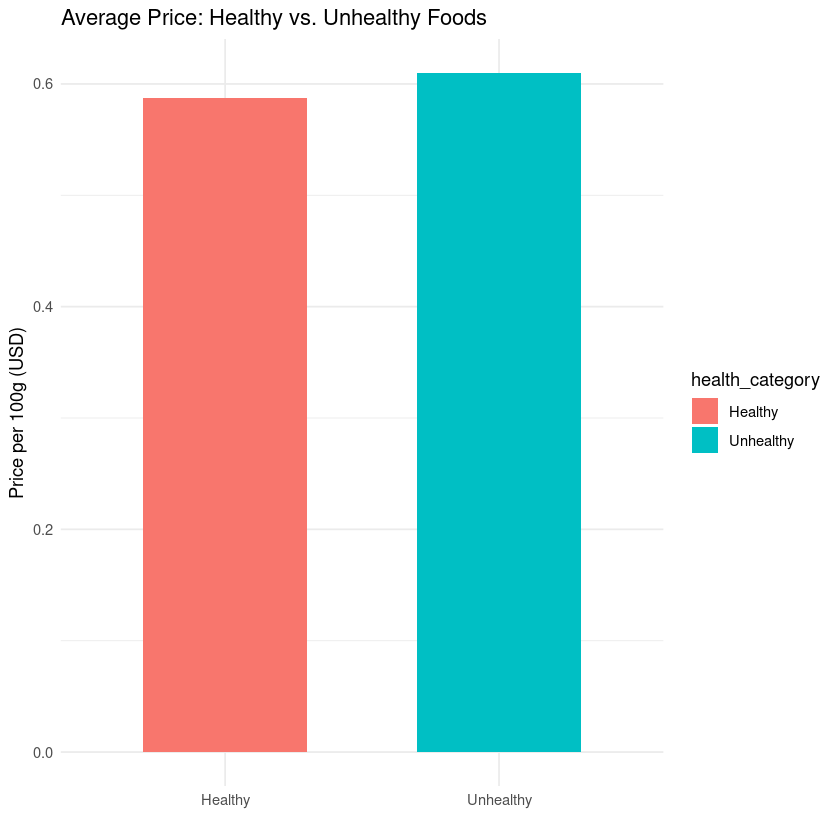

In [72]:
# Analyze Average Price by Healthiness
avg_price_health <- food_prices %>%
  group_by(health_category) %>%
  filter(Attribute == "Weighted mean unit value per 100 grams") %>%
  summarize(avg_price = mean(Value, na.rm = TRUE))

ggplot(avg_price_health, aes(x = health_category, y = avg_price, fill = health_category)) +
  geom_col(width = 0.6) +
  labs(title = "Average Price: Healthy vs. Unhealthy Foods",
       y = "Price per 100g (USD)", x = "") +
  theme_minimal()

**I'll be using 'Total weighted monthly sales in U.S. dollars' in food_prices data to calculate spending patterns by food category. It can help relate household spending power to actual food choices.**

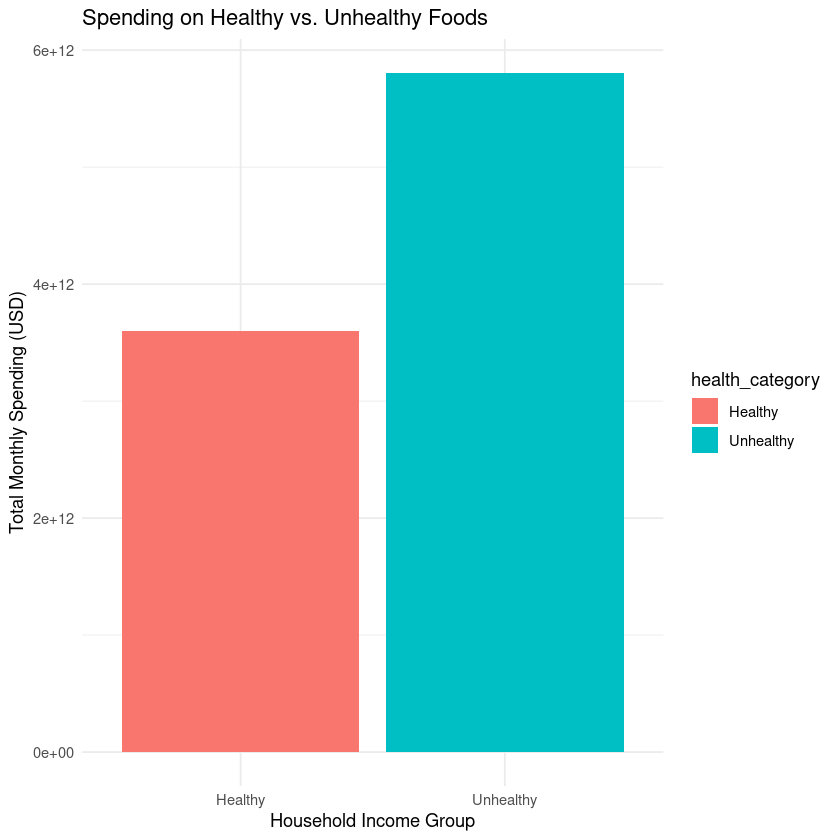

In [73]:
# Summarize spending on healthy food
spending_by_health <- food_prices %>%
  group_by(health_category) %>%
  filter(Attribute == "Total weighted monthly sales in U.S. dollars") %>%
  summarize(total_spending = sum(Value, na.rm = TRUE))

ggplot(spending_by_health, aes(x = health_category, y = total_spending, fill = health_category)) +
  geom_col(position = "dodge") +
  labs(title = "Spending on Healthy vs. Unhealthy Foods",
       y = "Total Monthly Spending (USD)",
       x = "Household Income Group") +
  theme_minimal()


## **Regional Patterns**

### **Healthy vs. Unhealthy foods by Region**

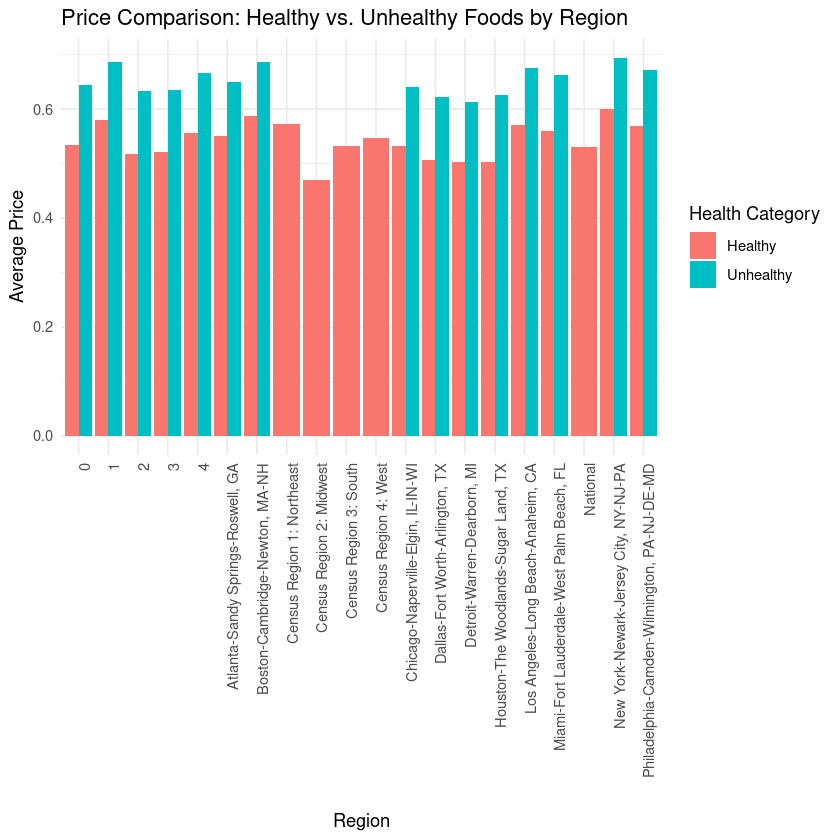

In [74]:
# Compare prices of healthy vs. unhealthy foods by region
ggplot(health_price_analysis, aes(x = Metroregion_code, y = Avg_price, fill = health_category)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Price Comparison: Healthy vs. Unhealthy Foods by Region",
        x = "Region",
        y = "Average Price",
        fill = "Health Category") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
  

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_bar()`).”


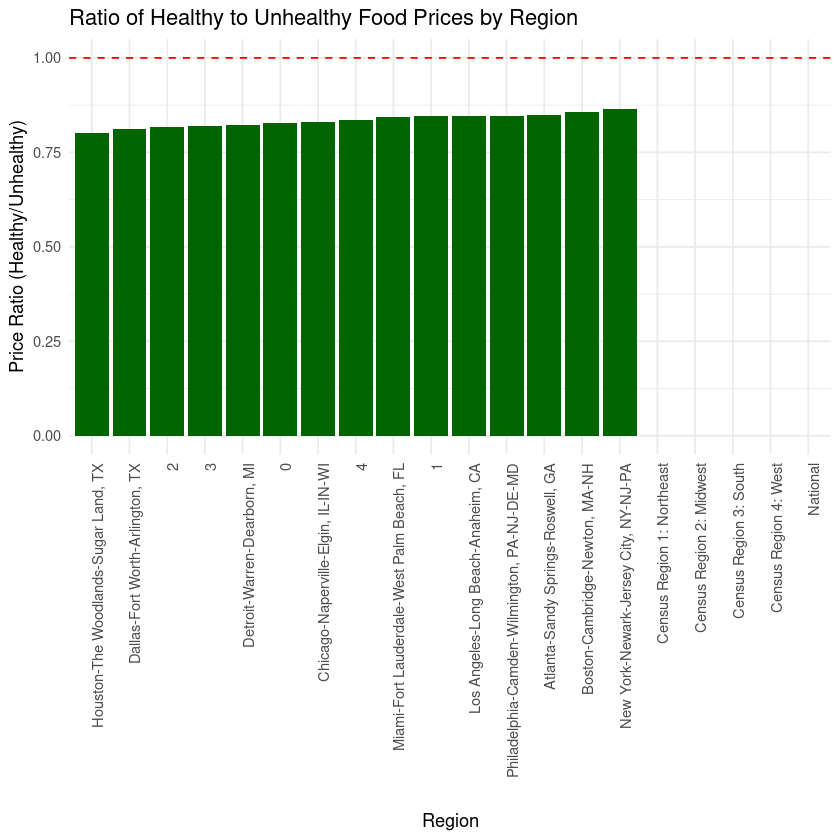

In [75]:
# Calculate health-to-unhealthy price ratios by region
health_price_ratio <- health_price_analysis %>%
  pivot_wider(names_from = health_category, values_from = Avg_price) %>%
  mutate(Healthy_to_Unhealthy_Ratio = Healthy / Unhealthy) %>%
  arrange(desc(Healthy_to_Unhealthy_Ratio))
  
# Visualize the ratio
ggplot(health_price_ratio, aes(x = reorder(Metroregion_code, Healthy_to_Unhealthy_Ratio), 
                                 y = Healthy_to_Unhealthy_Ratio)) +
  geom_bar(stat = "identity", fill = "darkgreen") +
  theme_minimal() +
  labs(title = "Ratio of Healthy to Unhealthy Food Prices by Region",
        x = "Region",
        y = "Price Ratio (Healthy/Unhealthy)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red")

### **Geographic Trends in Affordability**

**I'll be using 'Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula' in food_prices data to understand geographic trends in food affordability because a price index helps compare prices across regions relative to a base.**

Metroregion_code,price_index
<chr>,<dbl>
0,1.0058531
1,1.0363228
2,1.0016723
3,0.9964200
4,1.0221446
"Atlanta-Sandy Springs-Roswell, GA",1.0101287
"Boston-Cambridge-Newton, MA-NH",1.0148728
Census Region 1: Northeast,1.0147145
Census Region 2: Midwest,0.9594238


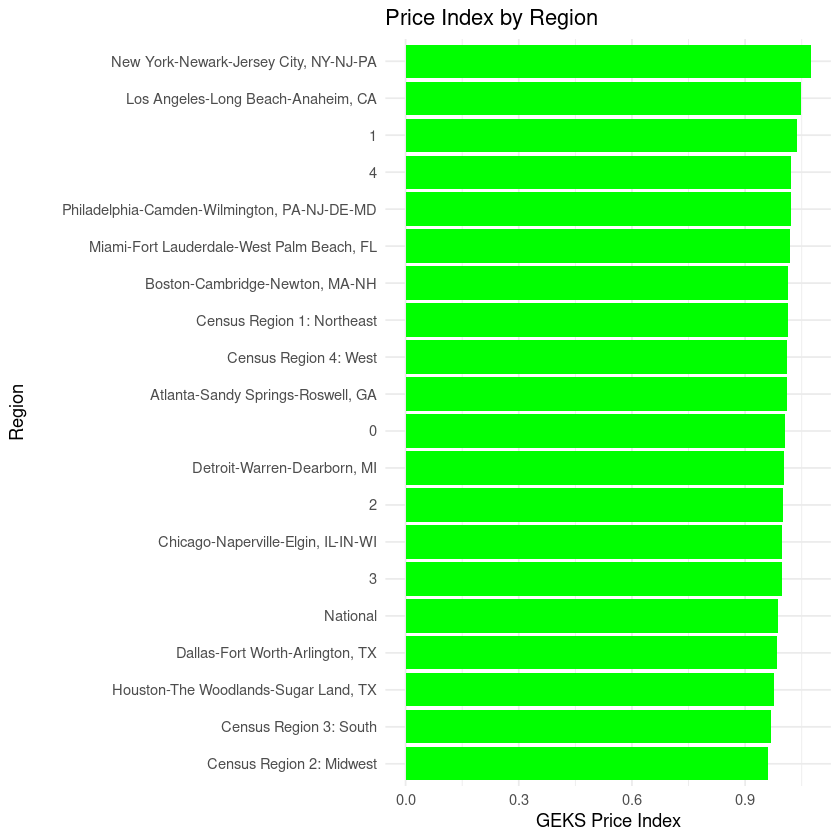

In [76]:
# Calculate average food prices by region
regional_prices <- food_prices %>%
  filter(Attribute == "Price index, constructed using Gini-Elteto-Koves-Szulc (GEKS) formula") %>%
  group_by(Metroregion_code) %>%
  summarize(price_index = mean(Value, na.rm = TRUE))
regional_prices

# Geographic Trends in Affordability
ggplot(regional_prices, aes(x = reorder(Metroregion_code, price_index), y = price_index)) +
  geom_col(fill = "green") +
  coord_flip() +
  labs(title = "Price Index by Region",
       y = "GEKS Price Index",
       x = "Region") +
  theme_minimal()

## **Summary of Key Insights Visualization**

In [77]:
# Create sample data that matches what is in the visualizations
data <- data.frame(
  region = c("Northeast", "Midwest", "South", "West"),
  healthyFoodPrice = c(0.58, 0.48, 0.52, 0.56),
  unhealthyFoodPrice = c(0.63, 0.56, 0.58, 0.64),
  healthScore = c(0.4, 0.2, 0.1, 0.35)
)

# Reshape the data from wide to long format for grouped bar chart
data_long <- data %>%
  tidyr::pivot_longer(
    cols = c(healthyFoodPrice, unhealthyFoodPrice, healthScore),
    names_to = "measure",
    values_to = "value"
  ) %>%
  mutate(measure = factor(measure, 
                          levels = c("healthyFoodPrice", "unhealthyFoodPrice", "healthScore"),
                          labels = c("Healthy Food Price", "Unhealthy Food Price", "Health Score")))

# Create the bar chart
key_viz <- ggplot(data_long, aes(x = region, y = value, fill = measure)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.8) +
  scale_fill_manual(values = c("Healthy Food Price" = "#ff6b6b", 
                               "Unhealthy Food Price" = "#4ecdc4", 
                               "Health Score" = "#1a535c")) +
  labs(
    title = "Food Affordability and Health Score by Region",
    x = "Region",
    y = "Value",
    fill = "Measure"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    legend.title = element_text(face = "bold"),
    legend.position = "right",
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_line(color = "gray95")
  )


**This plot shows the summary of all the important tasks in this challenge.**

In [78]:
summary_plot <- plotly::ggplotly(key_viz)
summary_plot

HTML widgets cannot be represented in plain text (need html)

## **Key Insights**

Income inequality does affect food affordability as lower-income households spend a much larger proportion of their income on expenses compared to higher-income households, leaving less flexibility for food choices. The lowest 20% income bracket has a median expense-to-income ratio of approximately 0.77, with some households spending more than they earn (ratios above 1.0). In contrast, the highest 20% income bracket has a much lower median ratio of about 0.3. This significant difference suggests that lower-income households have less financial flexibility and likely face greater challenges in affording food, especially if food prices increase. They would have less disposable income to allocate toward food choices. 

Also, some low-income households spend more than they earn (expense-to-income ratios above 1.0), creating financial instability that likely affects food decisions. Despite healthy foods being equally or less expensive than unhealthy options, the overall financial strain may limit food choices for lower-income households.

Contrary to popular belief, the data consistently shows that healthy foods are not more expensive than unhealthy options, and healthy foods are consistently less expensive than unhealthy options across all regions, as they cost about 80% of what unhealthy foods cost; the price per 100g shows near parity between healthy and unhealthy options, and healthy food affordability is consistent across regions.

And finally, regional price variations exist as the chart shows that Northeastern and Western regions (New York-New Jersey-PA, Los Angeles, Boston) have higher food prices overall compared to Southern and Midwestern regions.

### **Other Insights**

A strong correlation exists between age, gender, and dietary health scores. Age and gender significantly influence dietary health, as the data shows that dietary health scores improve substantially with age, especially for women, but this could also be due to the fact that there were not enough male entries in the dataset, especially from age 35 to above 65. The highest dietary health scores are among females above 65 years old. Males in the 18-24 category show particularly low dietary health scores.

Beverage choices reveal distinct consumption patterns. Dairy beverages are more likely to be consumed with meals. Soft drinks are often consumed occasionally (once a month), while coffee and tea show more frequent daily consumption patterns. 

Additionally, the data suggests that while higher education generally correlates with higher income, income inequality exists across all education levels, with the highest bracket consistently earning much more than other groups. Income generally increases with education level, particularly for the highest income bracket.



## **Implications For Policy Intervention**

Based on these findings, policymakers should consider the following intervention approaches:
1. **Education and Awareness**

- Develop campaigns to correct the misconception that healthy eating is expensive.
- Target nutrition education specifically toward young adults and males, who show lower dietary health scores.
- Create age-appropriate messaging that addresses the specific barriers each demographic faces.

2. **Income Support and Food Access**

- Implement financial assistance programs that recognize the disproportionate expense burden on lower-income households and income inequality.
- Design initiatives that address non-cost barriers to healthy eating, such as transportation to food retailers, time constraints for food preparation, storage and kitchen equipment access, and food preparation skills programs.

3. **Targeted Demographic Approaches**

- Design interventions specifically for young adults and males to improve their dietary choices.
- Leverage the knowledge and experience of older adults (particularly women) in community-based education programs.
- Create tailored messaging for different age groups addressing their specific needs and challenges.

4. **Regional Considerations**

- Acknowledge regional price variations while emphasizing the consistent affordability of healthy options.
- Adapt policies to regional food cultures and preferences.
- Address region-specific barriers to healthy food access.

5. **Beyond Price: Addressing Convenience and Accessibility**

- Invest in making healthy options more convenient and accessible.
- Support innovative food retail models in underserved areas.
- Implement policies that improve the relative convenience of healthy options compared to unhealthy alternatives.


## **Conclusion**

The analysis reveals that the challenges of healthy eating in America extend well beyond simple price comparisons. While healthy foods are consistently affordable relative to unhealthy options, various demographic, regional, and socioeconomic factors create barriers to healthy dietary choices. Effective policy interventions must address these complex factors rather than focusing exclusively on food prices. By targeting education, accessibility, convenience, and the specific needs of different demographic groups, policymakers can effectively improve dietary health outcomes across diverse American populations.